In [6]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [3]:
import folium
import pandas as pd
import requests
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = requests.get(URL)

if resp.status_code == 200:
    dataset_part_2_csv = io.StringIO(resp.text)
    df=pd.read_csv(dataset_part_2_csv)
else:
    print(f"Failed to fetch data from URL. Status code: {resp.status_code}")
    df = pd.DataFrame() # Create an empty DataFrame to avoid further errors if data fetching fails

# Calculate the mean latitude and longitude to center the map
mean_latitude = df['Latitude'].mean()
mean_longitude = df['Longitude'].mean()

# Create a Folium map centered at the mean coordinates
m = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=4)

# Add markers for each launch site
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['LaunchSite']
    ).add_to(m)

# Display the map
display(m)

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 2. Define sample lists for y_true (actual labels) and y_pred (predicted labels).
y_true = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
y_pred = [0, 0, 0, 1, 0, 1, 1, 1, 0, 1]

print("Actual Labels (y_true):", y_true)
print("Predicted Labels (y_pred):", y_pred)
print("\n")

# 3. Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)
print("\n")

# 4. Calculate and print the accuracy score
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# 5. Calculate and print the precision score
precision = precision_score(y_true, y_pred)
print(f"Precision Score: {precision:.4f}")

# 6. Calculate and print the recall score
recall = recall_score(y_true, y_pred)
print(f"Recall Score: {recall:.4f}")

# 7. Calculate and print the F1-score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.4f}")

Actual Labels (y_true): [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
Predicted Labels (y_pred): [0, 0, 0, 1, 0, 1, 1, 1, 0, 1]


Confusion Matrix:
[[4 1]
 [1 4]]


Accuracy Score: 0.8000
Precision Score: 0.8000
Recall Score: 0.8000
F1 Score: 0.8000


C:\Users\mazhe\AppData\Local\Temp\ipykernel_11528\3513453985.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LaunchSite', y='Class', data=success_rate_by_site, palette='viridis')


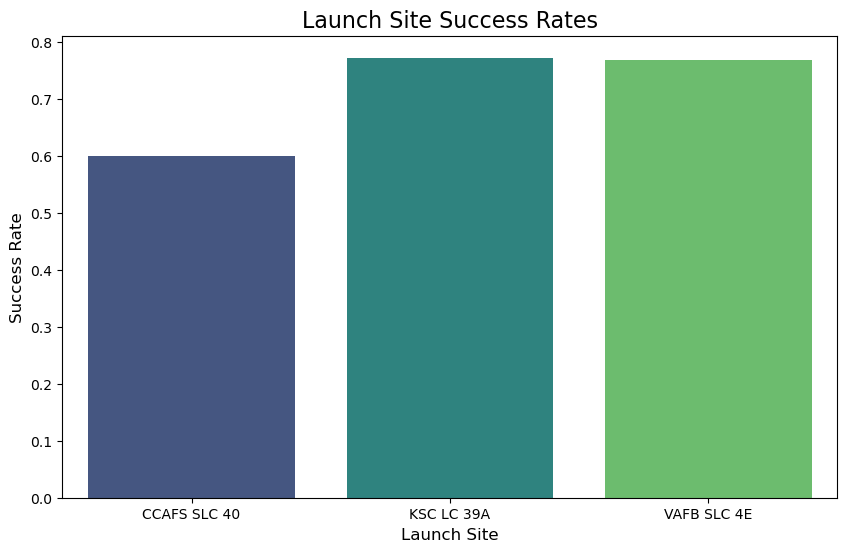

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Group by 'LaunchSite' and calculate the mean of 'Class' (success rate)
success_rate_by_site = df.groupby('LaunchSite')['Class'].mean().reset_index()

# 2. Create a bar chart using seaborn
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
sns.barplot(x='LaunchSite', y='Class', data=success_rate_by_site, palette='viridis')

# 3. Add a descriptive title
plt.title('Launch Site Success Rates', fontsize=16)

# 4. Label the x-axis and y-axis
plt.xlabel('Launch Site', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)

# Display the plot
plt.show()

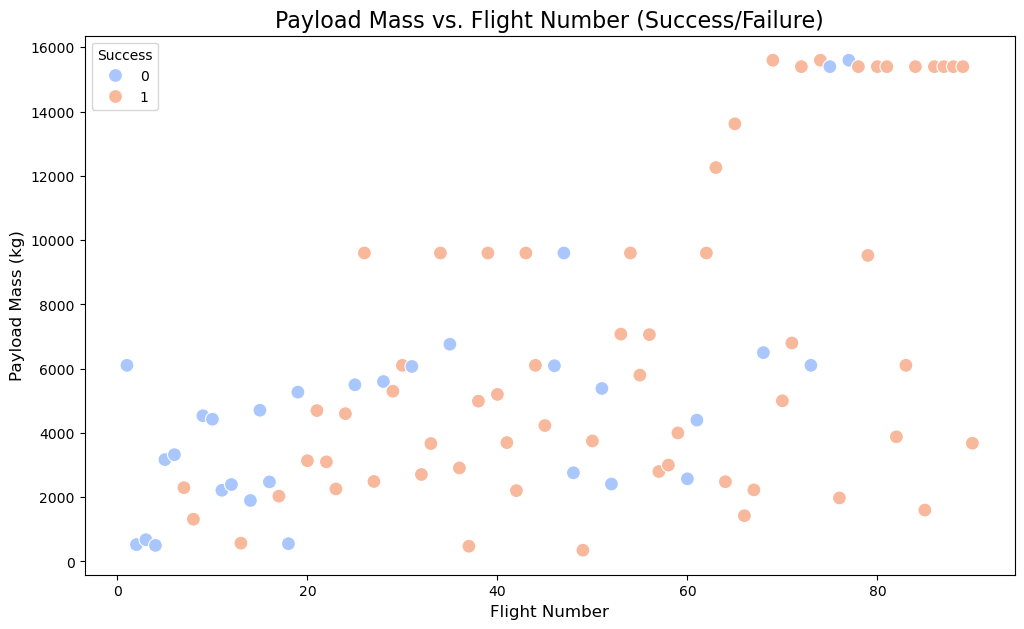

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of PayloadMass vs. FlightNumber, colored by Class
plt.figure(figsize=(12, 7))
sns.scatterplot(x='FlightNumber', y='PayloadMass', hue='Class', data=df, palette='coolwarm', s=100)

# Add title and labels
plt.title('Payload Mass vs. Flight Number (Success/Failure)', fontsize=16)
plt.xlabel('Flight Number', fontsize=12)
plt.ylabel('Payload Mass (kg)', fontsize=12)

# Add legend
plt.legend(title='Success', loc='best')

# Display the plot
plt.show()

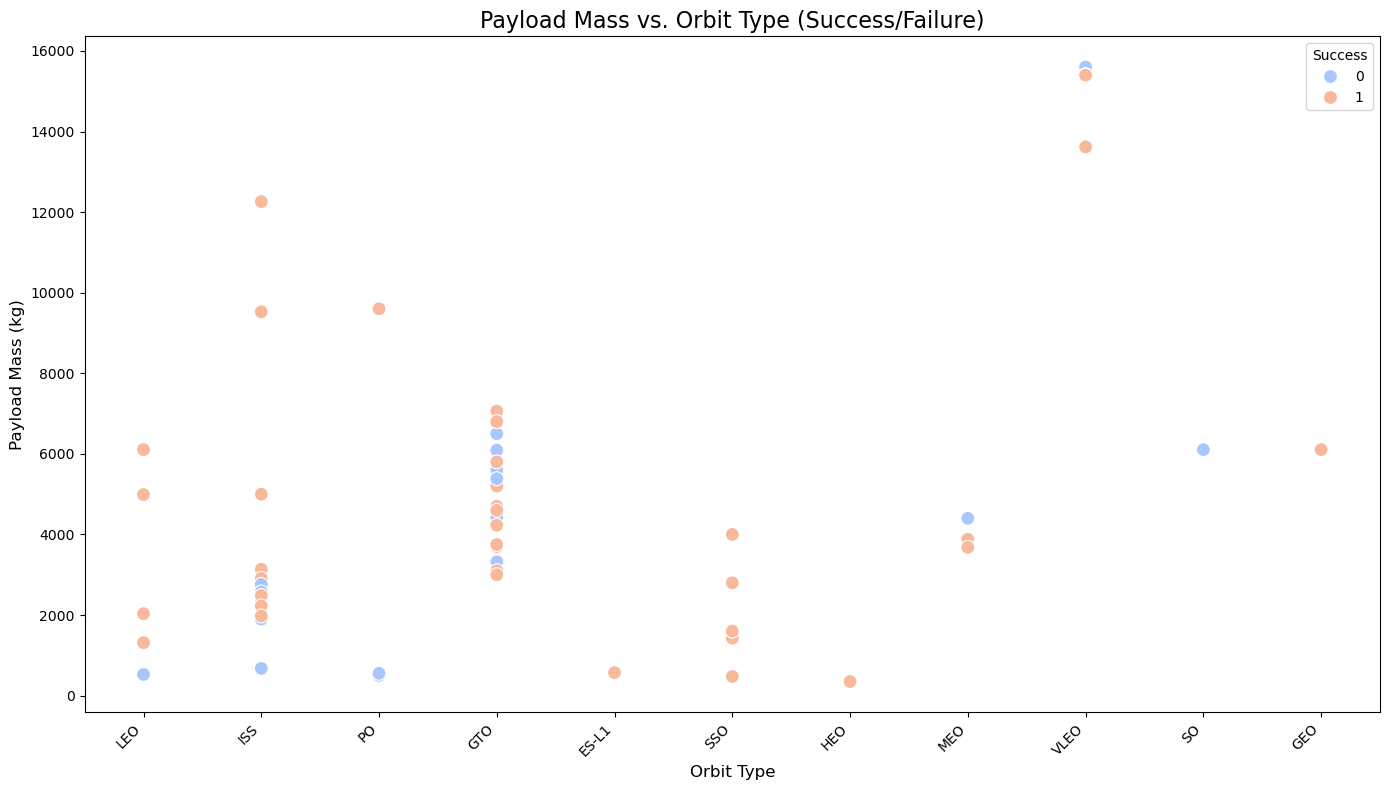

Scatter plot of Payload Mass vs. Orbit Type generated successfully.


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of PayloadMass vs. Orbit, colored by Class
plt.figure(figsize=(14, 8)) # Adjust figure size for better readability
sns.scatterplot(x='Orbit', y='PayloadMass', hue='Class', data=df, palette='coolwarm', s=100)

# Add title and labels
plt.title('Payload Mass vs. Orbit Type (Success/Failure)', fontsize=16)
plt.xlabel('Orbit Type', fontsize=12)
plt.ylabel('Payload Mass (kg)', fontsize=12)

# Add legend
plt.legend(title='Success', loc='best')

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()
print("Scatter plot of Payload Mass vs. Orbit Type generated successfully.")

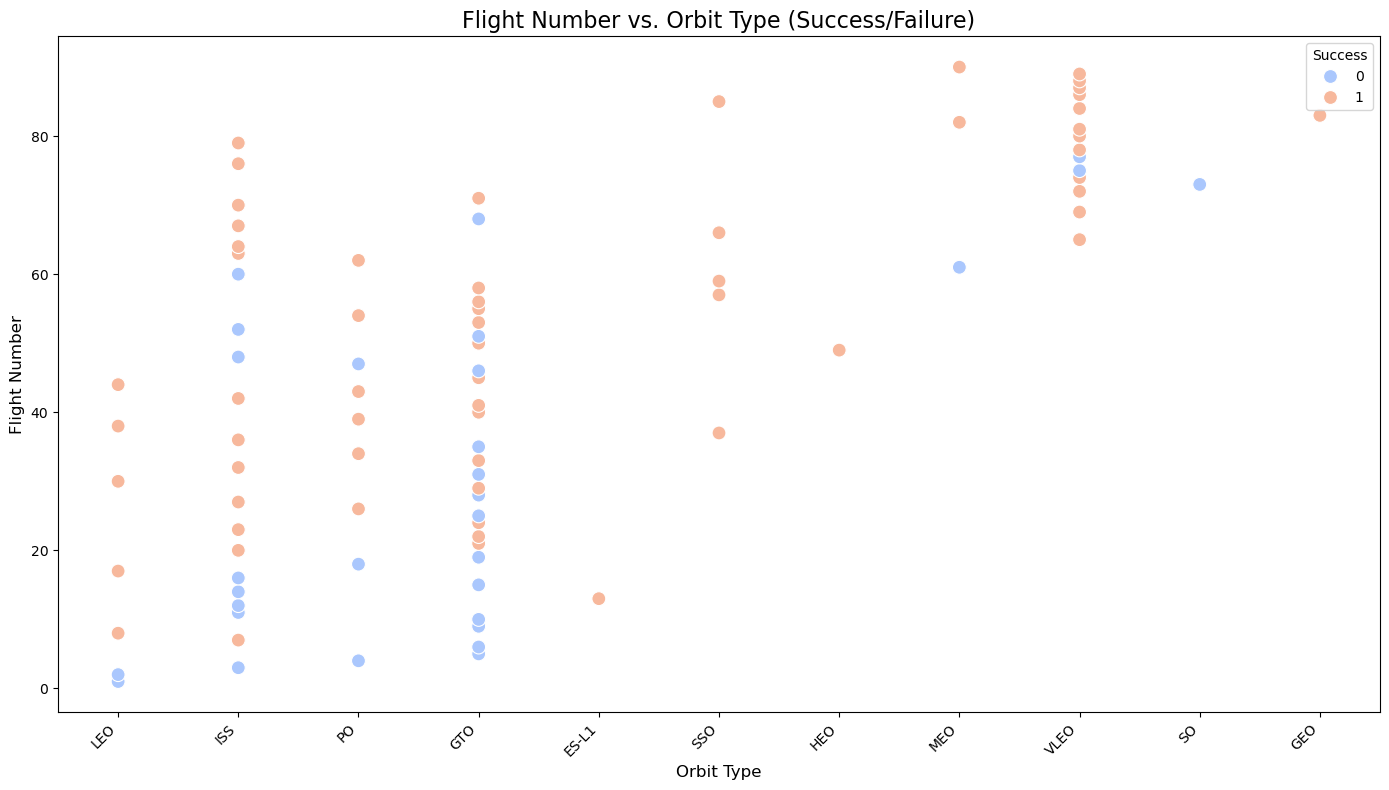

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of FlightNumber vs. Orbit, colored by Class
plt.figure(figsize=(14, 8)) # Adjust figure size for better readability
sns.scatterplot(x='Orbit', y='FlightNumber', hue='Class', data=df, palette='coolwarm', s=100)

# Add title and labels
plt.title('Flight Number vs. Orbit Type (Success/Failure)', fontsize=16)
plt.xlabel('Orbit Type', fontsize=12)
plt.ylabel('Flight Number', fontsize=12)

# Add legend
plt.legend(title='Success', loc='best')

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

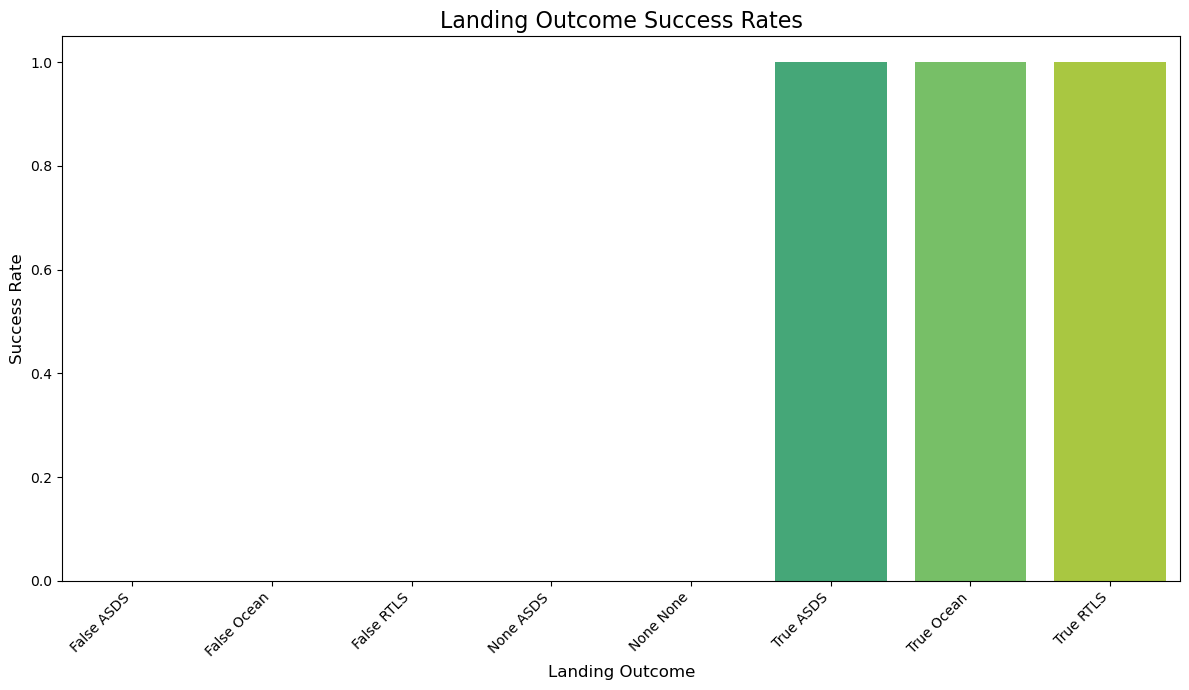

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Group by 'Outcome' and calculate the mean of 'Class' (success rate)
success_rate_by_landing = df.groupby('Outcome')['Class'].mean().reset_index()

# 2. Create a bar chart using seaborn
plt.figure(figsize=(12, 7)) # Adjust figure size for better readability
sns.barplot(x='Outcome', y='Class', hue='Outcome', data=success_rate_by_landing, palette='viridis', legend=False)

# 3. Add a descriptive title
plt.title('Landing Outcome Success Rates', fontsize=16);

# 4. Label the x-axis and y-axis
plt.xlabel('Landing Outcome', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()